## GeoData usage

In [ ]:
!pip install pyrosm

In [2]:
import geopandas as gpd
import pandas as pd
import pyrosm

/Users/danorel/Workspace/Hobbies/Programming/Hachaton/int20-ds/venv/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/bq/06qr0b4j0rl0fv6kwt_jr4lw0000gn/T/ipykernel_44462/558989996.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to mi

In [3]:
# Initialize the OSM object 
osm = pyrosm.OSM('./datasets/odessa_oblast-latest.osm.pbf')

# See the type
print("Type of 'osm' instance: ", type(osm))

Type of 'osm' instance:  <class 'pyrosm.pyrosm.OSM'>


In [4]:
nodes_net, drive_net = osm.get_network(nodes=True, network_type="driving")
print(nodes_net.shape)
print(drive_net.shape)

(515386, 8)
(552051, 38)


<AxesSubplot: >

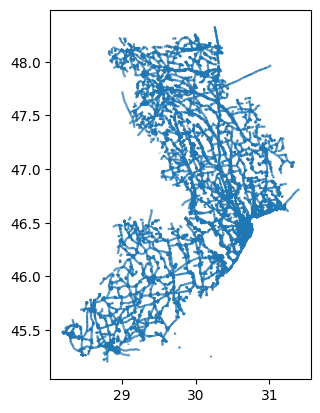

In [5]:
drive_net.plot()

<AxesSubplot: >

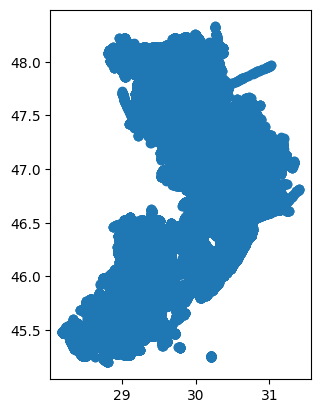

In [6]:
nodes_net.plot()

In [7]:
nodes_df = pd.read_csv('./datasets/nodes.csv')
nodes_df

,Id,node_start,node_finish,distance,speed
0,-2627062893189810184,10980432,2133368107,17.414917,32.0
1,-2627062893189810184,10980433,5212387954,17.186539,26.0
2,-2627062893189810184,10980445,5221700954,28.513481,26.0
3,-2627062893189810184,10980498,10980445,154.266122,25.0
4,-2627062893189810184,10980647,1986137911,8.542824,29.0
...,...,...,...,...,...
480286,-8229597404562288405,8952439761,317189358,4.847930,23.0
480287,-8229597404562288405,8952439762,8952439761,131.325685,26.0
480288,-8229597404562288405,8952439763,8952439762,44.026544,38.0
480289,-8229597404562288405,8952439764,8952439763,0.111226,34.0


In [8]:
nodes_net

,lon,lat,tags,timestamp,version,changeset,id,geometry
0,30.726735,46.417998,"{'bus': 'yes', 'name': '4-а станція Люстдорфсь...",1675408622,7,132030016,4374904173,POINT (30.72674 46.41800)
1,30.728752,46.418113,None,1235567821,6,662222,352682638,POINT (30.72875 46.41811)
2,30.729990,46.418192,None,1360360048,2,14961083,2142884470,POINT (30.72999 46.41819)
3,30.730786,46.418242,None,1411115275,1,25536642,3085790909,POINT (30.73079 46.41824)
4,30.733380,46.418398,None,1632780744,21,111790669,27126458,POINT (30.73338 46.41840)
...,...,...,...,...,...,...,...,...
515381,31.146605,46.851723,None,1677699212,1,133185397,10702675182,POINT (31.14661 46.85172)
515382,31.146687,46.851800,None,1677699212,1,133185397,10702675183,POINT (31.14669 46.85180)
515383,31.146773,46.851921,None,1677699212,1,133185397,10702675184,POINT (31.14677 46.85192)
515384,30.655059,46.296827,None,1677781360,1,133223426,10704969779,POINT (30.65506 46.29683)


In [9]:
nodes_df = nodes_df.merge(nodes_net, left_on=['node_start'], right_on=['id'])
nodes_df = nodes_df.merge(nodes_net, left_on=['node_finish'], right_on=['id'], suffixes=('_start' ,'_end'))

nodes_df

,Id,node_start,node_finish,distance,speed,lon_start,lat_start,tags_start,timestamp_start,version_start,...,id_start,geometry_start,lon_end,lat_end,tags_end,timestamp_end,version_end,changeset_end,id_end,geometry_end
0,-2627062893189810184,10980432,2133368107,17.414917,32.0,30.739248,46.472665,{'highway': 'traffic_signals'},1509928755,9,...,10980432,POINT (30.73925 46.47267),30.739022,46.472682,{'highway': 'crossing'},1509928757,2,53542595,2133368107,POINT (30.73902 46.47268)
1,-6374252502568484586,10980432,2133368107,17.414917,25.0,30.739248,46.472665,{'highway': 'traffic_signals'},1509928755,9,...,10980432,POINT (30.73925 46.47267),30.739022,46.472682,{'highway': 'crossing'},1509928757,2,53542595,2133368107,POINT (30.73902 46.47268)
2,-8332603950975862627,10980432,2133368107,17.414917,30.0,30.739248,46.472665,{'highway': 'traffic_signals'},1509928755,9,...,10980432,POINT (30.73925 46.47267),30.739022,46.472682,{'highway': 'crossing'},1509928757,2,53542595,2133368107,POINT (30.73902 46.47268)
3,6728710084682273587,10980432,2133368107,17.414917,27.0,30.739248,46.472665,{'highway': 'traffic_signals'},1509928755,9,...,10980432,POINT (30.73925 46.47267),30.739022,46.472682,{'highway': 'crossing'},1509928757,2,53542595,2133368107,POINT (30.73902 46.47268)
4,8390209597485549084,10980432,2133368107,17.415147,38.0,30.739248,46.472665,{'highway': 'traffic_signals'},1509928755,9,...,10980432,POINT (30.73925 46.47267),30.739022,46.472682,{'highway': 'crossing'},1509928757,2,53542595,2133368107,POINT (30.73902 46.47268)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398683,-2224898000409909488,7121991801,2395852314,7.103973,NaN,30.660740,46.365771,"{'crossing': 'marked', 'highway': 'crossing'}",1578654607,1,...,7121991801,POINT (30.66074 46.36577),30.660648,46.365764,None,1574350733,4,77387255,2395852314,POINT (30.66065 46.36576)
398684,-2224898000409909488,7121991819,490942781,49.888677,30.0,30.654700,46.365367,"{'crossing': 'marked', 'highway': 'crossing'}",1578654607,1,...,7121991819,POINT (30.65470 46.36537),30.654052,46.365324,None,1574350733,5,77387255,490942781,POINT (30.65405 46.36532)
398685,-2224898000409909488,7121991853,5224951056,7.375840,NaN,30.649665,46.365012,"{'crossing': 'marked', 'highway': 'crossing'}",1586353070,2,...,7121991853,POINT (30.64966 46.36501),30.649569,46.365009,"{'bus': 'yes', 'name': 'Селище Таїрове', 'name...",1510503596,1,53717070,5224951056,POINT (30.64957 46.36501)
398686,-2224898000409909488,7121991854,418739615,1.206030,NaN,30.648214,46.364845,"{'crossing': 'marked', 'highway': 'crossing'}",1578654607,1,...,7121991854,POINT (30.64821 46.36485),30.648125,46.364790,None,1566846332,4,73767224,418739615,POINT (30.64812 46.36479)


In [10]:
nodes_df.columns

Index(['Id', 'node_start', 'node_finish', 'distance', 'speed', 'lon_start',
       'lat_start', 'tags_start', 'timestamp_start', 'version_start',
       'changeset_start', 'id_start', 'geometry_start', 'lon_end', 'lat_end',
       'tags_end', 'timestamp_end', 'version_end', 'changeset_end', 'id_end',
       'geometry_end'],
      dtype='object')

In [11]:
nodes_df = nodes_df.drop(columns=['timestamp_start', 'timestamp_end', 'version_start', 'version_end', 'changeset_start', 'changeset_end', 'id_start', 'id_end', 'geometry_end', 'geometry_start'])

In [12]:
nodes_df.columns

Index(['Id', 'node_start', 'node_finish', 'distance', 'speed', 'lon_start',
       'lat_start', 'tags_start', 'lon_end', 'lat_end', 'tags_end'],
      dtype='object')

In [13]:
nodes_df.to_csv('nodes_extracted.csv')

In [14]:
nodes_df.isna().sum() 

Id                  0
node_start          0
node_finish         0
distance            0
speed            3658
lon_start           0
lat_start           0
tags_start     321021
lon_end             0
lat_end             0
tags_end       320925
dtype: int64

In [15]:
nodes_df

,Id,node_start,node_finish,distance,speed,lon_start,lat_start,tags_start,lon_end,lat_end,tags_end
0,-2627062893189810184,10980432,2133368107,17.414917,32.0,30.739248,46.472665,{'highway': 'traffic_signals'},30.739022,46.472682,{'highway': 'crossing'}
1,-6374252502568484586,10980432,2133368107,17.414917,25.0,30.739248,46.472665,{'highway': 'traffic_signals'},30.739022,46.472682,{'highway': 'crossing'}
2,-8332603950975862627,10980432,2133368107,17.414917,30.0,30.739248,46.472665,{'highway': 'traffic_signals'},30.739022,46.472682,{'highway': 'crossing'}
3,6728710084682273587,10980432,2133368107,17.414917,27.0,30.739248,46.472665,{'highway': 'traffic_signals'},30.739022,46.472682,{'highway': 'crossing'}
4,8390209597485549084,10980432,2133368107,17.415147,38.0,30.739248,46.472665,{'highway': 'traffic_signals'},30.739022,46.472682,{'highway': 'crossing'}
...,...,...,...,...,...,...,...,...,...,...,...
398683,-2224898000409909488,7121991801,2395852314,7.103973,NaN,30.660740,46.365771,"{'crossing': 'marked', 'highway': 'crossing'}",30.660648,46.365764,None
398684,-2224898000409909488,7121991819,490942781,49.888677,30.0,30.654700,46.365367,"{'crossing': 'marked', 'highway': 'crossing'}",30.654052,46.365324,None
398685,-2224898000409909488,7121991853,5224951056,7.375840,NaN,30.649665,46.365012,"{'crossing': 'marked', 'highway': 'crossing'}",30.649569,46.365009,"{'bus': 'yes', 'name': 'Селище Таїрове', 'name..."
398686,-2224898000409909488,7121991854,418739615,1.206030,NaN,30.648214,46.364845,"{'crossing': 'marked', 'highway': 'crossing'}",30.648125,46.364790,None


## Modeling

In [16]:
!pip install -U --pre pycaret

In [100]:
from pycaret.regression import *
from pycaret.utils import *
import numpy as np
from sklearn.metrics import mean_squared_error

In [101]:
dataset = pd.read_csv('datasets/big-table.csv')
dataset = dataset.dropna()
dataset = dataset.drop(columns=['Unnamed: 0', 'Id', 'completed_time'])
dataset

,running_time,route_distance_km,delta_time,node_start,node_finish,distance,speed,average_speed,lon_start,lat_start,lon_end,lat_end
0,2022-01-24 18:30:21,3.740,862.0,10980417,4768348185,31.771489,30.0,29.537736,30.738275,46.468524,30.738097,46.468266
3,2022-01-24 18:30:21,3.740,862.0,10980431,5125489557,50.034390,29.0,29.537736,30.739016,46.471232,30.738957,46.470784
4,2022-01-24 18:30:21,3.740,862.0,10980432,5213300015,13.453126,30.0,29.537736,30.739248,46.472665,30.739226,46.472545
5,2022-01-24 18:30:21,3.740,862.0,10980471,2133368054,15.994386,32.0,29.537736,30.739472,46.474116,30.739449,46.473965
7,2022-01-24 18:30:21,3.740,862.0,10980545,5213015312,47.897295,30.0,29.537736,30.740532,46.481082,30.740463,46.480654
...,...,...,...,...,...,...,...,...,...,...,...,...
401294,2022-01-24 14:57:46,2.323,819.0,5225320781,6570497841,11.114741,18.0,23.222222,30.728533,46.410472,30.728391,46.410452
401295,2022-01-24 14:57:46,2.323,819.0,6570497841,352681459,13.232601,21.0,23.222222,30.728391,46.410452,30.728222,46.410428
401296,2022-01-24 14:57:46,2.323,819.0,6570497861,1986778509,41.040972,17.0,23.222222,30.723430,46.409822,30.723333,46.410186
401297,2022-01-24 14:57:46,2.323,819.0,6573889998,312712557,20.488592,19.0,23.222222,30.726552,46.417987,30.726339,46.417987


In [143]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (297058, 12)
Unseen Data For Predictions: (33007, 12)


In [144]:
s = setup(data = data, target = 'delta_time', session_id=123)

,Description,Value
0,Session id,123
1,Target,delta_time
2,Target type,Regression
3,Original data shape,"(297058, 12)"
4,Transformed data shape,"(297058, 12)"
5,Transformed train set shape,"(207940, 12)"
6,Transformed test set shape,"(89118, 12)"
7,Numeric features,10
8,Categorical features,1
9,Preprocess,True


In [24]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [145]:
best_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.6395,372.3861,19.2973,0.9908,0.0358,0.0117
1,6.7742,387.8183,19.6931,0.9905,0.0388,0.0123
2,6.5571,352.7787,18.7824,0.9912,0.0352,0.0115
3,6.5912,376.7328,19.4096,0.9906,0.0377,0.0118
4,6.4346,349.3914,18.6920,0.9913,0.0346,0.0113
5,6.8558,409.1719,20.2280,0.9898,0.0386,0.0122
6,6.4767,344.6302,18.5642,0.9914,0.0355,0.0115
7,6.6858,383.1623,19.5745,0.9906,0.0428,0.0127
8,6.6299,373.6174,19.3292,0.9908,0.0363,0.0117


In [ ]:
tuned_best_model = tune_model(best_model)

In [146]:
# validate on unseen data
unseen_predictions = predict_model(tuned_best_model, data=data_unseen)
unseen_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,6.2022,298.9371,17.2898,0.9926,0.0328,0.0109


,running_time,route_distance_km,node_start,node_finish,distance,speed,average_speed,lon_start,lat_start,lon_end,lat_end,delta_time,prediction_label
0,2022-01-24 18:30:21,3.740,290891853,4441087524,59.342655,22.0,29.537735,30.736652,46.482773,30.737408,46.482719,862.0,862.504536
1,2022-01-24 18:30:21,3.740,2479719949,6806370974,18.176003,16.0,29.537735,30.732115,46.456554,30.732332,46.456490,862.0,862.347115
2,2022-01-24 18:30:21,3.740,4786018208,4845924947,30.463514,42.0,29.537735,30.733671,46.463360,30.733461,46.463127,862.0,862.515897
3,2022-01-24 18:30:21,3.740,5213300078,289702925,35.789761,31.0,29.537735,30.740143,46.478451,30.740093,46.478130,862.0,862.504536
4,2022-01-24 18:30:21,3.740,5214555660,6583283185,37.305794,34.0,29.537735,30.737041,46.467083,30.736790,46.466797,862.0,862.515897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33002,2022-01-24 14:57:46,2.323,352682638,4374904173,155.209946,20.0,23.222221,30.728752,46.418114,30.726734,46.417999,819.0,810.815438
33003,2022-01-24 14:57:46,2.323,2142884470,352682638,95.333694,25.0,23.222221,30.729990,46.418190,30.728752,46.418114,819.0,810.815438
33004,2022-01-24 14:57:46,2.323,3912884426,352681477,37.623245,23.0,23.222221,30.727289,46.410301,30.726809,46.410240,819.0,809.462788
33005,2022-01-24 14:57:46,2.323,4775806433,352666805,95.083893,27.0,23.222221,30.737497,46.418636,30.735846,46.418541,819.0,810.815438


In [147]:
mean_squared_error(unseen_predictions['delta_time'], unseen_predictions['prediction_label'], squared=False)

17.28979730742701

### Model predictions on test dataset

In [205]:
big_table_test_df = pd.read_csv("datasets/big-table-test.csv")

In [206]:
submission_df = pd.read_csv("datasets/submission.csv")
submission_df

,Id,Predicted
0,4567450496676323264,723.0
1,-1762687449608244695,689.0
2,558209096572647780,652.0
3,1091960336272216078,686.0
4,-1321994599972009663,630.0
...,...,...
995,-1019532991501300185,595.0
996,-3501571252544462083,535.0
997,8305010046033518305,678.0
998,5747749188503396733,683.0


In [183]:
submission_predictions = predict_model(tuned_best_model, data=big_table_test_df)
submission_predictions

In [186]:
predicted_df = submission_predictions[['Id', "prediction_label"]].drop_duplicates(subset=["Id"], keep='first')
predicted_df

,Id,prediction_label
0,-2627062893189810184,701.394759
158,3426541173123240405,874.153199
270,-3474192753915350461,709.206392
408,3538643101914165609,667.574452
505,-8718775480721360374,638.124297
...,...,...
78582,4250591723952515712,741.399455
78697,6641928463975996922,552.985845
78756,-3513599972731888784,554.503973
78803,3062492146546450059,687.221772


In [187]:
submission_df = submission_df \
    .merge(predicted_df, on='Id', how='inner') \
    .drop_duplicates(subset=["Id"], keep='first')
submission_df

,Id,Predicted,prediction_label
0,4567450496676323264,0,722.756787
1,-1762687449608244695,0,688.781344
2,558209096572647780,0,652.211769
3,1091960336272216078,0,686.050226
4,-1321994599972009663,0,629.535074
...,...,...,...
995,-1019532991501300185,0,594.943579
996,-3501571252544462083,0,535.186503
997,8305010046033518305,0,677.507831
998,5747749188503396733,0,682.683883


In [188]:
submission_df["Predicted"] = submission_df["prediction_label"]
submission_df.drop("prediction_label", axis=1, inplace=True)

In [201]:
submission_df.to_csv("datasets/submission.csv", index=False)

## Submission phase

Guide: https://www.kaggle.com/code/derrickmwiti/how-to-make-submissions-using-kaggle-s-api/notebook

In [157]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 956.6 kB/s eta 0:00:0031m1.7 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 2.2 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77716 sha256=4d4995205995927eea9373b2cfc50315342ec6ec99a2b9ba7fe08ecc8971f521
  Stored in directory: /Users/danorel/Library/Caches/pip/wheels/f3/16/ff/34e7d368370d4fd68bb749a59f1d2639ed66f3c14358e340a1
Successfully built kaggle


In [191]:
import os
os.environ["KAGGLE_USERNAME"]="beardimon"
os.environ["KAGGLE_KEY"]="22adc3776f244a54f4732bf8dfb077eb"

In [202]:
!kaggle competitions submit -c int20h-2023-hackathon  -f ./datasets/submission.csv -m "Baseline"

100%|██████████████████████████████████████| 25.8k/25.8k [00:01<00:00, 18.5kB/s]
Successfully submitted to INT20H 2023 Hackathon

In [203]:
!kaggle competitions leaderboard -c int20h-2023-hackathon --show

 teamId  teamName            submissionDate       score    
-------  ------------------  -------------------  -------  
9989061  Miedviediev Dmytro  2023-03-04 17:52:35  0.00000  


In [204]:
!kaggle competitions submissions -c int20h-2023-hackathon

fileName        date                 description  status    publicScore  privateScore  
--------------  -------------------  -----------  --------  -----------  ------------  
submission.csv  2023-03-04 17:52:35  Baseline     complete  0.00000                    
submission.csv  2023-03-04 17:38:47  Baseline     complete  0.00000                    
submission.csv  2023-03-04 17:28:51  Baseline     error                                
